In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Blibiotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
#Leitura do dataset para um DataFrame:
df_inicio = pd.read_excel("/content/drive/MyDrive/Ciência da Computação/Sirius - Clientes PF - CDL.xltx")
df_inicio.head(5)

,Codigo Cliente,Codigo Contrato,Data Inicio do contrato,Data Término do contrato,Fechado,Placa,Cor,Modelo,Valor Período (diária/mensal),Valor Periodo Seguro adicional,Periodo Tarifa,Valor Locação com seguro
0,77,2705,2022-12-22,2022-12-23,Sim,QQS9964,Branco,Ka 1.0 Ticvt Flex 8v 5p,89.00,28,1,117.00
1,77,2707,2022-12-28,2022-12-28,Sim,QUB6448,Branco,Fiat Strada Working Hard 1.4 Fire Flex 8V,133.00,39,1,172.00
2,77,2813,2023-01-13,2023-01-14,Sim,QUB6448,Branco,Fiat Strada Working Hard 1.4 Fire Flex 8V,250.00,39,1,289.00
3,63,2033,2022-06-17,2022-07-19,Sim,QOV8599,Branco,Ka + Sedan 1.5 16v Flex 4p,2500.00,177,30,2677.00
4,47,1596,2022-03-03,2022-04-03,Sim,QUB6267,Branco,Fiat Strada Working Hard 1.4 Fire Flex 8V,2000.00,255,30,2255.00


In [ ]:
# Converta as colunas de data para o tipo datetime
df_inicio['Data Inicio do contrato'] = pd.to_datetime(df_inicio['Data Inicio do contrato'])
df_inicio['Data Término do contrato'] = pd.to_datetime(df_inicio['Data Término do contrato'])

# Calcule a diferença em dias e salve em uma nova coluna
df_inicio['Quantidade de Dias'] = (df_inicio['Data Término do contrato'] - df_inicio['Data Inicio do contrato']).dt.days

# Exiba o dataframe resultante
df_inicio

,Codigo Cliente,Codigo Contrato,Data Inicio do contrato,Data Término do contrato,Fechado,Placa,Cor,Modelo,Valor Período (diária/mensal),Valor Periodo Seguro adicional,Periodo Tarifa,Valor Locação com seguro,Quantidade de Dias
0,77,2705,2022-12-22,2022-12-23,Sim,QQS9964,Branco,Ka 1.0 Ticvt Flex 8v 5p,89.00,28,1,117.00,1
1,77,2707,2022-12-28,2022-12-28,Sim,QUB6448,Branco,Fiat Strada Working Hard 1.4 Fire Flex 8V,133.00,39,1,172.00,0
2,77,2813,2023-01-13,2023-01-14,Sim,QUB6448,Branco,Fiat Strada Working Hard 1.4 Fire Flex 8V,250.00,39,1,289.00,1
3,63,2033,2022-06-17,2022-07-19,Sim,QOV8599,Branco,Ka + Sedan 1.5 16v Flex 4p,2500.00,177,30,2677.00,32
4,47,1596,2022-03-03,2022-04-03,Sim,QUB6267,Branco,Fiat Strada Working Hard 1.4 Fire Flex 8V,2000.00,255,30,2255.00,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,37,1237,2021-10-18,2021-11-12,Sim,QOV8619,Branco,Ka 1.0 Ticvt Flex 8v 5p,1600.00,177,30,1777.00,25
75,9,266,2020-11-05,2021-03-18,Sim,PZM6966,Branco,Ka 1.0 Ticvt Flex 8v 5p,1480.00,177,30,1657.00,133
76,9,648,2020-11-05,2021-10-13,Sim,QNY5612,Branco,Ka 1.0 Ticvt Flex 8v 5p,1480.00,177,30,1657.00,342
77,67,2248,2022-08-12,2022-08-15,Sim,QQS7867,Branco,Ka 1.0 Ticvt Flex 8v 5p,385.00,28,3,469.00,3


In [ ]:
# Calcule a quantidade de meses e os dias restantes
df_inicio['Quantidade de Meses'] = 0
df_inicio['Quantidade de Dias Restantes'] = 0

df_inicio.loc[df_inicio['Quantidade de Dias'] >= 30, 'Quantidade de Meses'] = df_inicio['Quantidade de Dias'] // 30
df_inicio.loc[df_inicio['Quantidade de Dias'] >= 30, 'Quantidade de Dias Restantes'] = df_inicio['Quantidade de Dias'] % 30

# Exiba o dataframe resultante
df_inicio

,Codigo Cliente,Codigo Contrato,Data Inicio do contrato,Data Término do contrato,Fechado,Placa,Cor,Modelo,Valor Período (diária/mensal),Valor Periodo Seguro adicional,Periodo Tarifa,Valor Locação com seguro,Quantidade de Dias,Quantidade de Meses,Quantidade de Dias Restantes
0,77,2705,2022-12-22,2022-12-23,Sim,QQS9964,Branco,Ka 1.0 Ticvt Flex 8v 5p,89.00,28,1,117.00,1,0,0
1,77,2707,2022-12-28,2022-12-28,Sim,QUB6448,Branco,Fiat Strada Working Hard 1.4 Fire Flex 8V,133.00,39,1,172.00,0,0,0
2,77,2813,2023-01-13,2023-01-14,Sim,QUB6448,Branco,Fiat Strada Working Hard 1.4 Fire Flex 8V,250.00,39,1,289.00,1,0,0
3,63,2033,2022-06-17,2022-07-19,Sim,QOV8599,Branco,Ka + Sedan 1.5 16v Flex 4p,2500.00,177,30,2677.00,32,1,2
4,47,1596,2022-03-03,2022-04-03,Sim,QUB6267,Branco,Fiat Strada Working Hard 1.4 Fire Flex 8V,2000.00,255,30,2255.00,31,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,37,1237,2021-10-18,2021-11-12,Sim,QOV8619,Branco,Ka 1.0 Ticvt Flex 8v 5p,1600.00,177,30,1777.00,25,0,0
75,9,266,2020-11-05,2021-03-18,Sim,PZM6966,Branco,Ka 1.0 Ticvt Flex 8v 5p,1480.00,177,30,1657.00,133,4,13
76,9,648,2020-11-05,2021-10-13,Sim,QNY5612,Branco,Ka 1.0 Ticvt Flex 8v 5p,1480.00,177,30,1657.00,342,11,12
77,67,2248,2022-08-12,2022-08-15,Sim,QQS7867,Branco,Ka 1.0 Ticvt Flex 8v 5p,385.00,28,3,469.00,3,0,0


In [ ]:
# Aplica a lógica condicional para calcular a coluna 'Valor do Aluguel Real'
df_inicio['Valor do Aluguel Real'] = 0

mask = df_inicio['Quantidade de Meses'] > 0
df_inicio.loc[mask, 'Valor do Aluguel Real'] = round(df_inicio['Valor Período (diária/mensal)'] * df_inicio['Quantidade de Meses'] + (df_inicio['Valor Período (diária/mensal)'] / 30 * df_inicio['Quantidade de Dias Restantes']))

mask = df_inicio['Quantidade de Dias'] < 30
df_inicio.loc[mask, 'Valor do Aluguel Real'] = df_inicio['Valor Período (diária/mensal)'] * df_inicio['Quantidade de Dias']

mask = df_inicio['Quantidade de Dias'] == 0
df_inicio.loc[mask, 'Valor do Aluguel Real'] = df_inicio['Valor Período (diária/mensal)']
# Exibe o dataframe resultante
df_inicio

,Codigo Cliente,Codigo Contrato,Data Inicio do contrato,Data Término do contrato,Fechado,Placa,Cor,Modelo,Valor Período (diária/mensal),Valor Periodo Seguro adicional,Periodo Tarifa,Valor Locação com seguro,Quantidade de Dias,Quantidade de Meses,Quantidade de Dias Restantes,Valor do Aluguel Real
0,77,2705,2022-12-22,2022-12-23,Sim,QQS9964,Branco,Ka 1.0 Ticvt Flex 8v 5p,89.00,28,1,117.00,1,0,0,89.00
1,77,2707,2022-12-28,2022-12-28,Sim,QUB6448,Branco,Fiat Strada Working Hard 1.4 Fire Flex 8V,133.00,39,1,172.00,0,0,0,133.00
2,77,2813,2023-01-13,2023-01-14,Sim,QUB6448,Branco,Fiat Strada Working Hard 1.4 Fire Flex 8V,250.00,39,1,289.00,1,0,0,250.00
3,63,2033,2022-06-17,2022-07-19,Sim,QOV8599,Branco,Ka + Sedan 1.5 16v Flex 4p,2500.00,177,30,2677.00,32,1,2,2667.00
4,47,1596,2022-03-03,2022-04-03,Sim,QUB6267,Branco,Fiat Strada Working Hard 1.4 Fire Flex 8V,2000.00,255,30,2255.00,31,1,1,2067.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,37,1237,2021-10-18,2021-11-12,Sim,QOV8619,Branco,Ka 1.0 Ticvt Flex 8v 5p,1600.00,177,30,1777.00,25,0,0,40000.00
75,9,266,2020-11-05,2021-03-18,Sim,PZM6966,Branco,Ka 1.0 Ticvt Flex 8v 5p,1480.00,177,30,1657.00,133,4,13,6561.00
76,9,648,2020-11-05,2021-10-13,Sim,QNY5612,Branco,Ka 1.0 Ticvt Flex 8v 5p,1480.00,177,30,1657.00,342,11,12,16872.00
77,67,2248,2022-08-12,2022-08-15,Sim,QQS7867,Branco,Ka 1.0 Ticvt Flex 8v 5p,385.00,28,3,469.00,3,0,0,1155.00


In [ ]:
# Extrair o ano da data de início do contrato
df_inicio['Ano'] = pd.to_datetime(df_inicio['Data Inicio do contrato']).dt.year

df_inicio

,Codigo Cliente,Codigo Contrato,Data Inicio do contrato,Data Término do contrato,Fechado,Placa,Cor,Modelo,Valor Período (diária/mensal),Valor Periodo Seguro adicional,Periodo Tarifa,Valor Locação com seguro,Quantidade de Dias,Quantidade de Meses,Quantidade de Dias Restantes,Valor do Aluguel Real,Ano
0,77,2705,2022-12-22,2022-12-23,Sim,QQS9964,Branco,Ka 1.0 Ticvt Flex 8v 5p,89.00,28,1,117.00,1,0,0,89.00,2022
1,77,2707,2022-12-28,2022-12-28,Sim,QUB6448,Branco,Fiat Strada Working Hard 1.4 Fire Flex 8V,133.00,39,1,172.00,0,0,0,133.00,2022
2,77,2813,2023-01-13,2023-01-14,Sim,QUB6448,Branco,Fiat Strada Working Hard 1.4 Fire Flex 8V,250.00,39,1,289.00,1,0,0,250.00,2023
3,63,2033,2022-06-17,2022-07-19,Sim,QOV8599,Branco,Ka + Sedan 1.5 16v Flex 4p,2500.00,177,30,2677.00,32,1,2,2667.00,2022
4,47,1596,2022-03-03,2022-04-03,Sim,QUB6267,Branco,Fiat Strada Working Hard 1.4 Fire Flex 8V,2000.00,255,30,2255.00,31,1,1,2067.00,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,37,1237,2021-10-18,2021-11-12,Sim,QOV8619,Branco,Ka 1.0 Ticvt Flex 8v 5p,1600.00,177,30,1777.00,25,0,0,40000.00,2021
75,9,266,2020-11-05,2021-03-18,Sim,PZM6966,Branco,Ka 1.0 Ticvt Flex 8v 5p,1480.00,177,30,1657.00,133,4,13,6561.00,2020
76,9,648,2020-11-05,2021-10-13,Sim,QNY5612,Branco,Ka 1.0 Ticvt Flex 8v 5p,1480.00,177,30,1657.00,342,11,12,16872.00,2020
77,67,2248,2022-08-12,2022-08-15,Sim,QQS7867,Branco,Ka 1.0 Ticvt Flex 8v 5p,385.00,28,3,469.00,3,0,0,1155.00,2022


In [ ]:
# Agrupar os dados por modelo de carro e calcular a lucratividade média
lucratividade_por_modelo = df_inicio.groupby('Modelo')['Valor do Aluguel Real'].mean().sort_values(ascending=False)

# Exibir a tabela de lucratividade por modelo de carro com duas casas decimais
pd.options.display.float_format = '{:.2f}'.format
print(lucratividade_por_modelo)

Modelo
Saveiro Robust 1.6 Total Flex 8V            67480.00
Onix Hatch 1.0  8v Flex Power 5p            13411.00
Ka + Sedan 1.5 16v Flex 4p                   6252.29
Ka 1.0 Ticvt Flex 8v 5p                      5737.15
Fiat Uno Vivace 1.0 Fire Flex 8V 4P          2772.00
Fiat Strada Working Hard 1.4 Fire Flex 8V    1040.80
Hb20 Sense 1.0 Flex                           345.00
Chev/Onix 10tat Ltz                            92.00
Name: Valor do Aluguel Real, dtype: float64


In [ ]:
# Converter dados para formato de transações
transactions = df_inicio.groupby(df_inicio.index)['Modelo'].apply(list).tolist()

# Usar TransactionEncoder para transformar os dados
te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
df_transformed = pd.DataFrame(te_ary, columns=te.columns_)

# Aplicar o algoritmo Apriori
frequent_itemsets = apriori(df_transformed, min_support=0.2, use_colnames=True)

# Gerar regras de associação
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)

# Exibir os resultados
print("Frequent Itemsets:")
print(frequent_itemsets)
print("\nAssociation Rules:")
print(rules)

Frequent Itemsets:
   support                   itemsets
0     0.73  (Ka 1.0 Ticvt Flex 8v 5p)

Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []


In [ ]:
# Conta a quantidade de Codigo Contrato por ano
contagem_contratos_por_ano = df_inicio.groupby('Ano')['Codigo Contrato'].count()

# Exibe a contagem
print(contagem_contratos_por_ano)

Ano
2020     4
2021    15
2022    37
2023    23
Name: Codigo Contrato, dtype: int64


In [ ]:
# Filtra os contratos mensais
contratos_mensais = df_inicio[df_inicio['Periodo Tarifa'] == 30].groupby('Ano')['Codigo Contrato'].count()

# Filtra os contratos diários
contratos_diarios = df_inicio[df_inicio['Periodo Tarifa'] < 30].groupby('Ano')['Codigo Contrato'].count()

# Exibe a contagem de contratos mensais
print("Contratos Mensais:")
print(contratos_mensais)

# Exibe a contagem de contratos diários
print("\nContratos Diários:")
print(contratos_diarios)

Contratos Mensais:
Ano
2020     3
2021     9
2022    23
2023     4
Name: Codigo Contrato, dtype: int64

Contratos Diários:
Ano
2020     1
2021     6
2022    14
2023    19
Name: Codigo Contrato, dtype: int64


In [ ]:
# Filtra os dados onde 'Periodo Tarifa' é igual a 1 e realiza a soma de 'Valor do Aluguel Real'
soma_aluguel_real_diaria = df_inicio.loc[df_inicio['Periodo Tarifa'] < 30, 'Valor do Aluguel Real'].sum()

# Filtra os dados onde 'Periodo Tarifa' é igual a 30 e realiza a soma de 'Valor do Aluguel Real'
soma_aluguel_real_mensal = df_inicio.loc[df_inicio['Periodo Tarifa'] == 30, 'Valor do Aluguel Real'].sum()

# Exibe a soma
print("Soma do Valor do Aluguel Real (Periodo Tarifa < 30):", soma_aluguel_real_diaria)
print("Soma do Valor do Aluguel Real (Periodo Tarifa = 30):", soma_aluguel_real_mensal)
soma_aluguel_real_diaria + soma_aluguel_real_mensal

Soma do Valor do Aluguel Real (Periodo Tarifa < 30): 75175.5
Soma do Valor do Aluguel Real (Periodo Tarifa = 30): 473622.0


548797.5

In [ ]:
#Soma dos contratos diários separados por ano

valor_contratos_diarios_anual = df_inicio[df_inicio['Periodo Tarifa'] < 30].groupby('Ano')['Valor do Aluguel Real'].sum()
print('Valores diários: \n', valor_contratos_diarios_anual)

valor_contratos_mensal_anual = df_inicio[df_inicio['Periodo Tarifa'] == 30].groupby('Ano')['Valor do Aluguel Real'].sum()
print('Valores mensais: \n', valor_contratos_mensal_anual)

Valores diários: 
 Ano
2020    1000.00
2021   12057.90
2022   17871.00
2023   44246.60
Name: Valor do Aluguel Real, dtype: float64
Valores mensais: 
 Ano
2020    82883.00
2021    76290.00
2022   173427.00
2023   141022.00
Name: Valor do Aluguel Real, dtype: float64


In [ ]:
# Contar as placas únicas por ano
placas_por_ano = df_inicio.groupby('Ano')['Placa'].nunique().reset_index()

# Exibir o resultado
print(placas_por_ano)

    Ano  Placa
0  2020      3
1  2021      8
2  2022     17
3  2023     11


In [ ]:
# Agrupar as placas e modelos únicos por ano
placas_modelos_por_ano = df_inicio.groupby('Ano').agg({'Placa': pd.Series.unique, 'Modelo': pd.Series.unique}).reset_index()

# Exibir o resultado

df = pd.DataFrame(placas_modelos_por_ano)
print(placas_modelos_por_ano)
df

    Ano                                              Placa  \
0  2020                        [QNZ0241, PZM6966, QNY5612]   
1  2021  [PZM6980, QQS7857, QNE2903, QNW0305, QNY5609, ...   
2  2022  [QQS9964, QUB6448, QOV8599, QUB6267, QQS9966, ...   
3  2023  [QUB6448, QOV8599, QNV6811, QOV8592, QXJ0363, ...   

                                              Modelo  
0                          [Ka 1.0 Ticvt Flex 8v 5p]  
1  [Ka 1.0 Ticvt Flex 8v 5p, Ka + Sedan 1.5 16v F...  
2  [Ka 1.0 Ticvt Flex 8v 5p, Fiat Strada Working ...  
3  [Fiat Strada Working Hard 1.4 Fire Flex 8V, Ka...  


,Ano,Placa,Modelo
0,2020,"[QNZ0241, PZM6966, QNY5612]",[Ka 1.0 Ticvt Flex 8v 5p]
1,2021,"[PZM6980, QQS7857, QNE2903, QNW0305, QNY5609, ...","[Ka 1.0 Ticvt Flex 8v 5p, Ka + Sedan 1.5 16v F..."
2,2022,"[QQS9964, QUB6448, QOV8599, QUB6267, QQS9966, ...","[Ka 1.0 Ticvt Flex 8v 5p, Fiat Strada Working ..."
3,2023,"[QUB6448, QOV8599, QNV6811, QOV8592, QXJ0363, ...","[Fiat Strada Working Hard 1.4 Fire Flex 8V, Ka..."


In [ ]:
# Agrupar as placas e modelos dos carros por ano
df_modelos = placas_modelos_por_ano = df_inicio.groupby(['Ano', 'Placa'])['Modelo'].unique().reset_index()

# Exibir o resultado
print(placas_modelos_por_ano)

     Ano    Placa                                             Modelo
0   2020  PZM6966                          [Ka 1.0 Ticvt Flex 8v 5p]
1   2020  QNY5612                          [Ka 1.0 Ticvt Flex 8v 5p]
2   2020  QNZ0241                          [Ka 1.0 Ticvt Flex 8v 5p]
3   2021  PZM6980                          [Ka 1.0 Ticvt Flex 8v 5p]
4   2021  QNE2903                          [Ka 1.0 Ticvt Flex 8v 5p]
5   2021  QNF9858                          [Ka 1.0 Ticvt Flex 8v 5p]
6   2021  QNW0305                       [Ka + Sedan 1.5 16v Flex 4p]
7   2021  QNY5609                          [Ka 1.0 Ticvt Flex 8v 5p]
8   2021  QNY5612                          [Ka 1.0 Ticvt Flex 8v 5p]
9   2021  QOV8619                          [Ka 1.0 Ticvt Flex 8v 5p]
10  2021  QQS7857                          [Ka 1.0 Ticvt Flex 8v 5p]
11  2022  QNF9858                          [Ka 1.0 Ticvt Flex 8v 5p]
12  2022  QNV0923                       [Ka + Sedan 1.5 16v Flex 4p]
13  2022  QNY5609                 

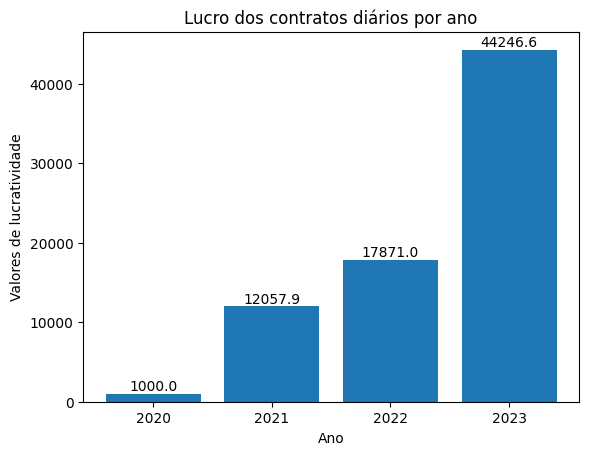

In [ ]:
# Plotando o gráfico de barras
plt.bar(valor_contratos_diarios_anual.index, valor_contratos_diarios_anual.values)

# Definindo os rótulos do eixo x e y
plt.xlabel('Ano')
plt.ylabel('Valores de lucratividade')

# Definindo o título do gráfico
plt.title('Lucro dos contratos diários por ano')

# Ajustar os rótulos do eixo x para exibir apenas os anos inteiros
plt.xticks(valor_contratos_diarios_anual.index.astype(int))

# Adicionando os valores no topo de cada barra
for i, valor in enumerate(valor_contratos_diarios_anual.values):
    plt.text(valor_contratos_diarios_anual.index[i], valor, str(valor), ha='center', va='bottom')

# Exibindo o gráfico
plt.show()

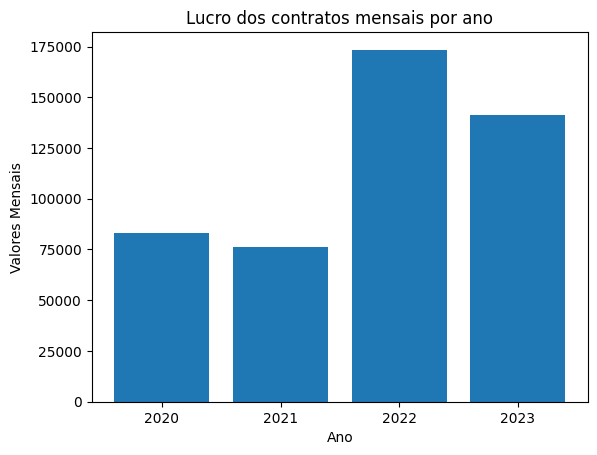

In [ ]:
# Plotando o gráfico de barras
plt.bar(valor_contratos_mensal_anual.index, valor_contratos_mensal_anual.values)

# Definindo os rótulos do eixo x e y
plt.xlabel('Ano')
plt.ylabel('Valores Mensais')

# Definindo o título do gráfico
plt.title('Lucro dos contratos mensais por ano')

# Ajustar os rótulos do eixo x para exibir apenas os anos inteiros
plt.xticks(valor_contratos_mensal_anual.index.astype(int))

# Exibindo o gráfico
plt.show()

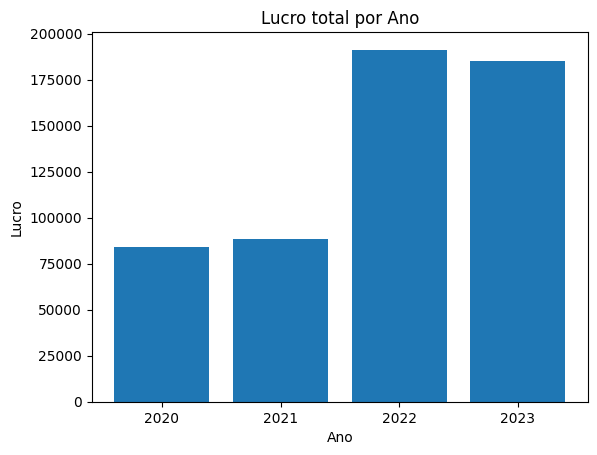

In [ ]:
# Calcular o lucro total por ano
lucro_por_ano = df_inicio.groupby('Ano')['Valor do Aluguel Real'].sum()

# Plotar o gráfico de lucro por ano
plt.bar(lucro_por_ano.index, lucro_por_ano.values)
plt.xlabel('Ano')
plt.ylabel('Lucro')
plt.title('Lucro total por Ano')

# Ajustar os rótulos do eixo x para exibir apenas os anos inteiros
plt.xticks(lucro_por_ano.index.astype(int))

plt.show()

In [ ]:
# Calcular o lucro total por ano
lucro_por_ano = df_inicio.groupby('Ano')['Valor do Aluguel Real'].sum()

print(lucro_por_ano)

soma = 0
for i in lucro_por_ano:
    soma += i
print('Valor Total: ', soma)



Ano
2020    83883.00
2021    88347.90
2022   191298.00
2023   185268.60
Name: Valor do Aluguel Real, dtype: float64
Valor Total:  548797.5


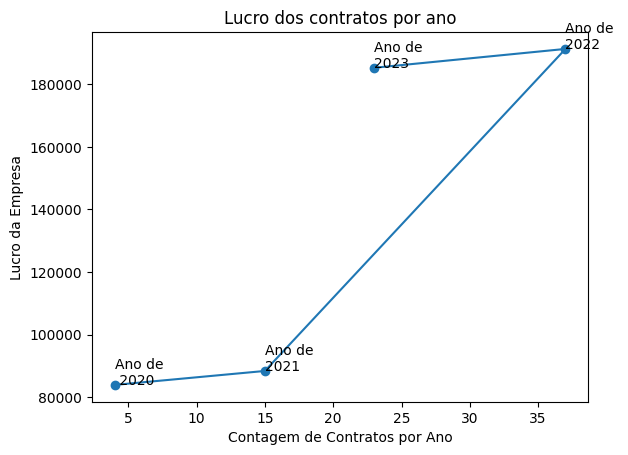

In [ ]:
# Dados de lucro total por ano
lucro_por_ano = [83883, 88347.90, 191298, 185268.60]

# Anos
anos = ['Ano de\n 2020', 'Ano de \n2021', 'Ano de \n2022', 'Ano de \n2023']

ano_contag = np.array(contagem_contratos_por_ano).reshape(-1, 1)

for i in range(len(anos)):
    plt.annotate(anos[i], (ano_contag[i], lucro_por_ano[i]))

# Criar o gráfico de dispersão com linha
plt.plot(contagem_contratos_por_ano, lucro_por_ano, marker='o', linestyle='-')

# Configurar o gráfico
plt.xlabel('Contagem de Contratos por Ano')
plt.ylabel('Lucro da Empresa')
plt.title('Lucro dos contratos por ano')

# Exibir o gráfico
plt.show()

In [ ]:
# Calcular a porcentagem de aumento entre os anos
porcentagens_aumento = []
for i in range(3):
    aumento = lucro_por_ano[i+1] - lucro_por_ano[i]
    porcentagem = (aumento / lucro_por_ano[i]) * 100
    porcentagens_aumento.append(porcentagem)

# Exibir a porcentagem de aumento entre os anos
for i in range(len(porcentagens_aumento)):
    ano_atual = i + 2021
    ano_anterior = i + 2020
    if i == 0:
      print(f"Porcentagem de aumento de {ano_anterior} para {ano_atual}: {porcentagens_aumento[i]:.2f}%")
    elif i == 1:
      print(f"Porcentagem de aumento de {ano_anterior} para {ano_atual}: {porcentagens_aumento[i]:.2f}%")
      print(f'Porcentagem de aumento de 2021 para 2023 {round((lucro_por_ano[3]-lucro_por_ano[1])/lucro_por_ano[1]*100,2)}%')
    elif i ==2:
      print(f"Porcentagem de aumento de {ano_anterior} para {ano_atual}: {porcentagens_aumento[i]:.2f}%")
      print(f'Porcentagem de aumento de 2023 para 2022 {round((lucro_por_ano[2]-lucro_por_ano[3])/lucro_por_ano[3]*100,2)}%')

Porcentagem de aumento de 2020 para 2021: 5.32%
Porcentagem de aumento de 2021 para 2022: 116.53%
Porcentagem de aumento de 2021 para 2023 109.7%
Porcentagem de aumento de 2022 para 2023: -3.15%
Porcentagem de aumento de 2023 para 2022 3.25%


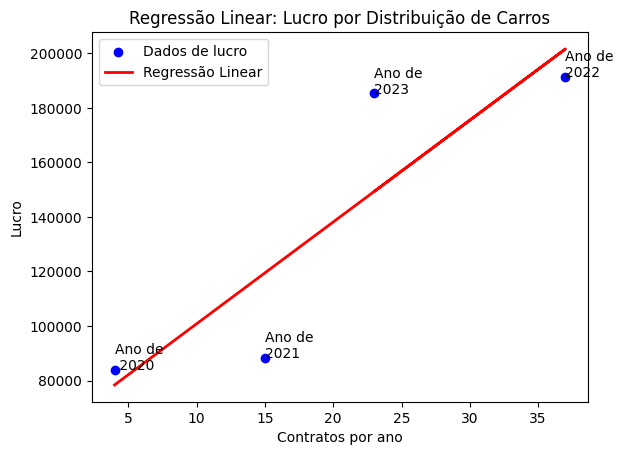

In [ ]:
# Anos
anos = ['Ano de\n 2020', 'Ano de \n2021', 'Ano de \n2022', 'Ano de \n2023']

ano_contag = np.array(contagem_contratos_por_ano).reshape(-1, 1)

for i in range(len(anos)):
    plt.annotate(anos[i], (ano_contag[i], lucro_por_ano[i]))

# Transformar os dados em arrays numpy e reshape
x = np.array(contagem_contratos_por_ano).reshape(-1, 1)
y = np.array(lucro_por_ano)

# Criar o modelo de regressão linear
regressor = LinearRegression()
regressor.fit(x, y)

# Realizar previsões para os dados de treinamento
y_pred = regressor.predict(x)

# Plotar o gráfico da regressão linear
plt.scatter(contagem_contratos_por_ano, lucro_por_ano, color='blue', label='Dados de lucro')
plt.plot(contagem_contratos_por_ano, y_pred, color='red', linewidth=2, label='Regressão Linear')
plt.xlabel('Contratos por ano')
plt.ylabel('Lucro')
plt.title('Regressão Linear: Lucro por Distribuição de Carros')
plt.legend()
plt.show()

Coeficiente Angular: 3734.2612095032387
Coeficiente Linear: 63447.71611231104


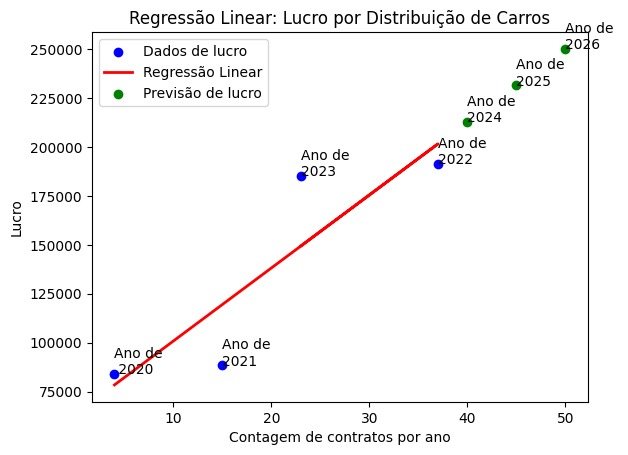

In [ ]:
# Transformar os dados em arrays numpy e reshape
x = np.array(contagem_contratos_por_ano).reshape(-1, 1)
y = np.array(lucro_por_ano)

# Criar o modelo de regressão linear
regressor = LinearRegression()
regressor.fit(x, y)

# Prever o lucro para uma nova distribuição de carros
nova_distribuicao_de_contratos = [[40], [45], [50]]  # Exemplo de nova distribuição de carros
previsao_lucro = regressor.predict(nova_distribuicao_de_contratos)

# Exibir os coeficientes da regressão linear
coeficiente_angular = regressor.coef_[0]
coeficiente_linear = regressor.intercept_
print("Coeficiente Angular:", coeficiente_angular)
print("Coeficiente Linear:", coeficiente_linear)

# Anos
anos = ['Ano de\n 2020', 'Ano de \n2021', 'Ano de \n2022', 'Ano de \n2023']
anos_previsao = ['Ano de \n2024', 'Ano de \n2025', 'Ano de \n2026']
ano_contag = np.array(contagem_contratos_por_ano).reshape(-1, 1)

for i in range(len(anos)):
    plt.annotate(anos[i], (ano_contag[i], lucro_por_ano[i]))

for i in range(len(anos_previsao)):
    plt.annotate(anos_previsao[i], (nova_distribuicao_de_contratos[i][0], previsao_lucro[i]))



# Plotar o gráfico da regressão linear
plt.scatter(contagem_contratos_por_ano, lucro_por_ano, color='blue', label='Dados de lucro')
plt.plot(contagem_contratos_por_ano, regressor.predict(x), color='red', linewidth=2, label='Regressão Linear')
plt.scatter(nova_distribuicao_de_contratos, previsao_lucro, color='green', label='Previsão de lucro')
plt.xlabel('Contagem de contratos por ano')
plt.ylabel('Lucro')
plt.title('Regressão Linear: Lucro por Distribuição de Carros')
plt.legend()
plt.show()

In [ ]:
# Exibir o lucro previsto para nova distribuição de contratos por ano
for i, qtd_carros in enumerate(nova_distribuicao_de_contratos):
    print("Lucro previsto para", qtd_carros[0], "Contrados: R$",round(previsao_lucro[i],2))

Lucro previsto para 40 Contrados: R$ 212818.16
Lucro previsto para 45 Contrados: R$ 231489.47
Lucro previsto para 50 Contrados: R$ 250160.78


In [ ]:
# Calcular a porcentagem de aumento entre os anos
porcentagens_aumento_carros = []
for i in range(2):
    aumento = previsao_lucro[i+1] - previsao_lucro[i]
    porcentagem = (aumento / lucro_por_ano[i]) * 100
    porcentagens_aumento_carros.append(porcentagem)

# Exibir a porcentagem de aumento entre os anos
for i in range(len(porcentagens_aumento_carros)):
    z = nova_distribuicao_de_contratos[i]
    x = nova_distribuicao_de_contratos[i+1]
    print(f"Porcentagem de aumento de {z} para {x}: {porcentagens_aumento[i]:.2f}%")

Porcentagem de aumento de [40] para [45]: 5.32%
Porcentagem de aumento de [45] para [50]: 116.53%


In [ ]:
#Leitura do concorrente para um DataFrame:

df_con = pd.read_excel("/content/drive/MyDrive/Ciência da Computação/Cópia de Concorrente - RELATORIO PONTUAL PF 2020 A 2023.xlsx")
df_con

,CodigoCliente,CodigoContrato,DataInicio,DataTermino,Fechado,Placa,Cor,Modelo,ValorPeriodoVeiculo,ValorCombustivel,ValorLocacao,PeriodoTarifa,ValorDiversos
0,477,22580,2020-09-25 00:00:00,2020-09-28,Sim,RFM9A47,Branco Banchisa,Gol 1.0 Flex 12v 5p,80.00,0.00,240.00,1,0.00
1,1035,22593,2020-09-28 00:00:00,2020-11-26,Sim,QPO8329,Prata,Gol 1.0 Flex 12v 5p,1800.00,142.52,3879.95,30,0.00
2,521,22596,2020-09-28 00:00:00,2020-11-18,Sim,QWU1181,Prata,Etios Hb Xls 1.5,63.34,173.06,3553.40,1,150.00
3,1609,22626,2020-10-05 00:00:00,2020-10-08,Sim,PWY8734,Branca,Fiorino Furgão 1.4 Flex,183.33,0.00,549.99,1,0.00
4,1881,22628,2020-10-06 00:00:00,2020-10-07,Sim,RFP7J83,Branca,Ka Se 1.0 Ha,55.56,0.00,100.00,1,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,2392,37245,2023-04-05 17:17:36,2023-04-16,Não,QWY6223,Branca,Toro Endurance Atd4,363.63,0.00,0.00,1,NaN
456,235,37244,2023-04-06 00:00:00,2023-04-19,Não,RUL0F35,Branca,S10 Pick-up Ltz Dd4 A,270.00,0.00,0.00,1,NaN
457,2280,37288,2023-04-14 16:37:01,2023-04-17,Sim,RUF2F65,Branco,Voyage 1.0 Flex 12v 4p,190.00,0.00,570.00,1,0.00
458,2487,37290,2023-04-15 00:00:00,2023-04-22,Não,RTI9F95,Branca,Spin Primier 1.8 8v Econo.Flex 5p Mec,260.00,0.00,0.00,1,NaN


In [ ]:
# Converter dados para formato de transações
transactions = df_con.groupby(df_con.index)['Modelo'].apply(list).tolist()

# Usar TransactionEncoder para transformar os dados
te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
df_transformed = pd.DataFrame(te_ary, columns=te.columns_)

# Aplicar o algoritmo Apriori
frequent_itemsets = apriori(df_transformed, min_support=0.1, use_colnames=True)

# Gerar regras de associação
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.4)

# Exibir os resultados
print("Frequent Itemsets:")
print(frequent_itemsets)
print("\nAssociation Rules:")
print(rules)

Frequent Itemsets:
   support                  itemsets
0     0.12     (Gol 1.0 Flex 12v 5p)
1     0.14  (Gol 1.6 Msi Flex 8v 5p)
2     0.13            (Ka Se 1.0 Ha)

Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []
